# MNIST Classifier using an Convolutional Neural Network

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

Using TensorFlow backend.


In [2]:
(trainx, trainy), (testx, testy) = mnist.load_data()

print('Train Data shape: ', trainx.shape)
print('Test Data shape: ', testx.shape)

TRAIN X shape:  (60000, 28, 28)
TEST X shape:  (10000, 28, 28)


In [3]:
img_dims = namedtuple('img_dims', 'height, width, channels, flat_vec_size')
IMG_DIMS = img_dims(height=trainx.shape[1], 
                    width=trainx.shape[2], 
                    channels=1, 
                    flat_vec_size=trainx.shape[1] * trainx.shape[2])

# RESHAPING AND REFORMATTING DATA

# adding the channel dimension in addition to height and width
trainx = trainx.reshape(trainx.shape[0], IMG_DIMS.height, IMG_DIMS.width, IMG_DIMS.channels).astype('float32') 
testx = testx.reshape(testx.shape[0], IMG_DIMS.height, IMG_DIMS.width, IMG_DIMS.channels).astype('float32')

trainy = np_utils.to_categorical(trainy)     # converts classes to one-hot encoding
testy = np_utils.to_categorical(testy)

# NORMALIZING
trainx = trainx / 255.
testx = testx / 255.

### Note: Input to the Conv layers should be NHWC formatted rather than a flattened vector in a Vanilla NN

In [4]:
# MODELING
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_DIMS.height, IMG_DIMS.width, IMG_DIMS.channels)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
# TRAINING
epochs=10
history = model.fit(trainx, trainy, batch_size=128, epochs=epochs, validation_data=(testx, testy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 164s 3ms/step - loss: 0.1762 - acc: 0.9461 - val_loss: 0.0452 - val_acc: 0.9852
Epoch 2/10
60000/60000 [==============================] - 238s 4ms/step - loss: 0.0520 - acc: 0.9837 - val_loss: 0.0407 - val_acc: 0.9854
Epoch 3/10
60000/60000 [==============================] - 216s 4ms/step - loss: 0.0374 - acc: 0.9884 - val_loss: 0.0381 - val_acc: 0.9886
Epoch 4/10
60000/60000 [==============================] - 189s 3ms/step - loss: 0.0281 - acc: 0.9913 - val_loss: 0.0361 - val_acc: 0.9881
Epoch 5/10
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0235 - acc: 0.9925 - val_loss: 0.0296 - val_acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 162s 3ms/step - loss: 0.0176 - acc: 0.9939 - val_loss: 0.0338 - val_acc: 0.9900
Epoch 7/10
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0142 - acc: 0.9953 - val_loss: 0.0380 - 

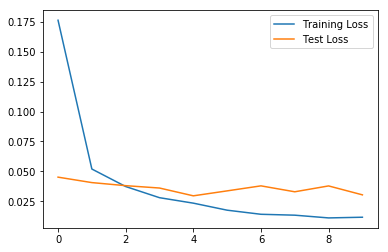

In [6]:
plt.plot(range(epochs), history.history['loss'], label='Training Loss')
plt.plot(range(epochs), history.history['val_loss'], label='Test Loss')
plt.legend(loc='upper right')

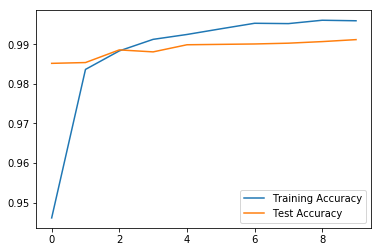

In [7]:
plt.plot(range(epochs), history.history['acc'], label='Training Accuracy')
plt.plot(range(epochs), history.history['val_acc'], label='Test Accuracy')
plt.legend(loc='lower right')

### Final Training Loss: 0.0118
### Final Test Loss: 0.0304

### Final Training Accuracy: 99.60%
### Final Test Accuracy: 99.12%